In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
iris=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
X,y=iris.iloc[:,:-1],iris.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
X, y,test_size=0.33,random_state=42)
X_train, X_test, y_train, y_test=np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
scaler=StandardScaler()
scaler.fit(X_train)
X_train,X_test=scaler.transform(X_train),scaler.transform(X_test)

X_train.shape

(100, 4)

In [56]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
model=tf.keras.Sequential(
[
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
]
)
model.compile(loss="categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy","recall","precision"])
enc = OneHotEncoder(handle_unknown='ignore')
encoding=enc.fit_transform(y_train.reshape(-1,1)).toarray()
history = model.fit(X_train, encoding, epochs=50)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3275 - loss: 1.2035 - precision: 0.4689 - recall: 0.0615  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3442 - loss: 1.1447 - precision: 0.6091 - recall: 0.0858 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3801 - loss: 1.0940 - precision: 0.6940 - recall: 0.1046 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3791 - loss: 1.0649 - precision: 0.8692 - recall: 0.1416 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4251 - loss: 1.0330 - precision: 0.9647 - recall: 0.1567 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4967 - loss: 1.0215 - precision: 0.9640 - recall: 0.1359 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4790 - loss: 0.9975 - precision: 1.0000 - recall: 0.1762 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5558 - loss: 0.9609 - precision: 1.0000 - recall: 0.2166 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,705 (22.29 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
y_pred=model.predict(X_test)
y_pred_classes=enc.categories_[0][y_pred.argmax(axis=1)]
model.evaluate(X_test, enc.transform(y_test.reshape(-1,1)).toarray())

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepWARNING:tensorflow:5 out of the last 35 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fb3148500d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8621 - loss: 0.4392 - precision: 0.9029 - recall: 0.8146 


[0.45815640687942505,
 0.8399999737739563,
 0.800000011920929,
 0.8888888955116272]

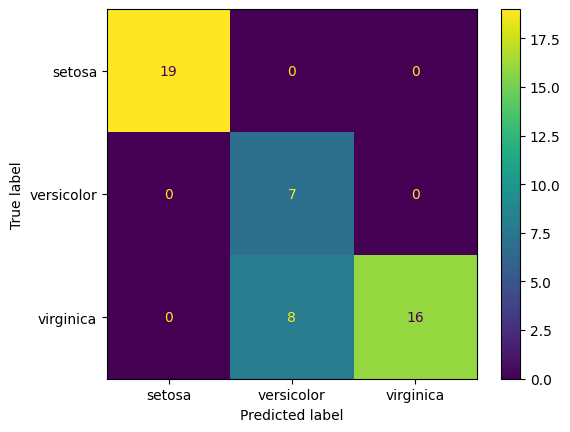

In [60]:
ConfusionMatrixDisplay.from_predictions(y_pred_classes,y_test)

In [61]:
model.save("my_model.keras")